# Fake News Detection with LSTM

## Table of Content

1.0 &nbsp;&nbsp; Import Modules  
2.0 &nbsp;&nbsp; Import Data  
3.0 &nbsp;&nbsp; Exploratory Data Analysis (EDA)  
3.1 &nbsp;&nbsp; Fake News  
3.1.1 Wordcloud Fake News  
3.2 &nbsp;&nbsp; True News  
3.2.1 Wordcloud True News  
4.0 &nbsp;&nbsp; Data Preprocessing  
5.0 &nbsp;&nbsp; Regression Model  
6.0 &nbsp;&nbsp; LSTM Model

## 1.0 Import Modules

In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

#NLTK libraries
import nltk
import re
import string
import gensim
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers.core import Dense, Activation, Dropout

## 2.0 Import Data

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake['target'] = 1
true['target'] = 0
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [4]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


## 3.0 Exploratory Data Analysis (EDA)

### 3.1 Fake News

In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   target   23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [6]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

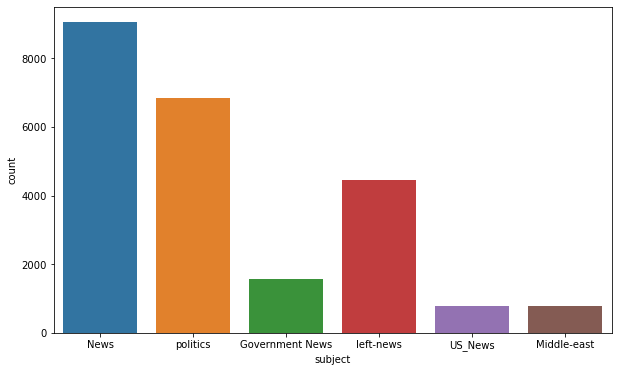

In [7]:
#countplot of fake News column 'subject'
plt.figure(figsize = (10, 6))
sns.countplot('subject', data = fake)

#### 3.1.1 Wordcloud Fake News

In [8]:
#create list from data of column "text"
faketext = " ".join(fake['text'].tolist())

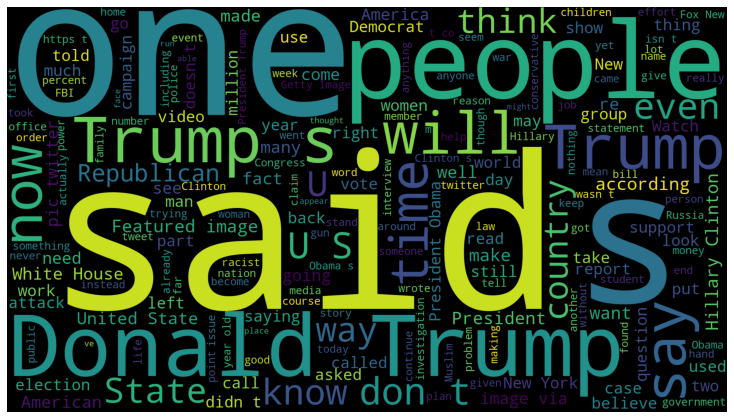

In [9]:
#create wordcloud for fake news
wordcloud = WordCloud(width = 1920, height = 1080).generate(faketext)
fig = plt.figure(figsize = (10, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3.2 True News

In [10]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   target   21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [11]:
true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

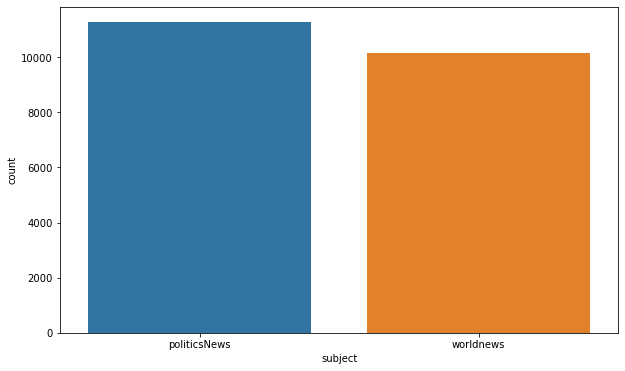

In [12]:
#countplot of True News column 'subject'
plt.figure(figsize = (10, 6))
sns.countplot('subject', data = true)

#### 3.2.1 Wordcloud True News

In [13]:
#create list from data of column "text"
truetext = " ".join(true['text'].tolist())

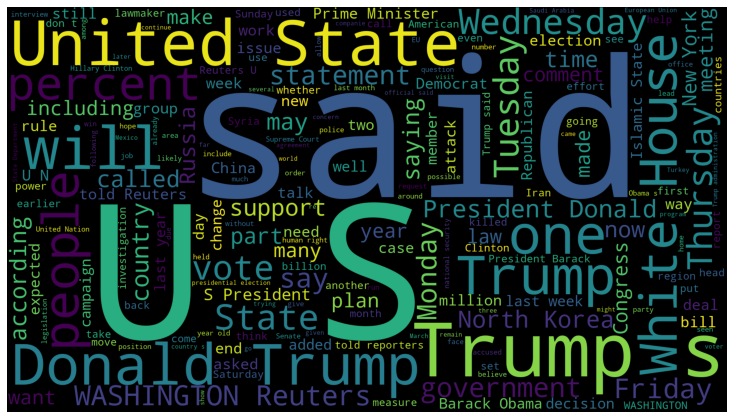

In [14]:
#create wordcloud for true news
wordcloud = WordCloud(width = 1920, height = 1080).generate(truetext)
fig = plt.figure(figsize = (10, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 4.0 Data Preprocessing

In [15]:
#merging both datframes into one
df = pd.concat([fake, true]).reset_index(drop = True)

In [16]:
#shuffle the rows to avoid possible bias
df = shuffle(df)
df = df.reset_index(drop=True)
df.head()

,title,text,subject,date,target
0,Nobel laureate says Trump policies may lead to...,STOCKHOLM (Reuters) - U.S. President-elect Don...,politicsNews,"December 7, 2016",0
1,Ryan says Trump to address joint session of Co...,WASHINGTON (Reuters) - U.S. House of Represen...,politicsNews,"January 24, 2017",0
2,FLASHBACK: EVIDENCE SHOWS “CROOKED” HILLARY Ha...,If anyone were to tell you 20 years ago that a...,politics,"May 29, 2016",1
3,COL OLIVER NORTH: FIVE FACTS That Prove Obama’...,Col Oliver North lists the 5 irrefutable facts...,politics,"Aug 12, 2016",1
4,"HILLARY: “Trump Is Offensive To Women, But So ...",Really Hillary? Why don t you tell us about me...,politics,"Aug 11, 2015",1


In [17]:
#drop unnecessary columns
df = df.drop(columns = ['title', 'subject', 'date'])
df.head()

,text,target
0,STOCKHOLM (Reuters) - U.S. President-elect Don...,0
1,WASHINGTON (Reuters) - U.S. House of Represen...,0
2,If anyone were to tell you 20 years ago that a...,1
3,Col Oliver North lists the 5 irrefutable facts...,1
4,Really Hillary? Why don t you tell us about me...,1


In [18]:
#storing data in in a new dataframe
dfclean = df

In [19]:
#sample text snippet
dfclean['text'][4][:200]

'Really Hillary? Why don t you tell us about men who are  offensive to women Donald Trump s remarks about Fox News anchor Megyn Kelly are offensive, but the rest of the Republican field is equally offe'

In [20]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(dfclean)):
    news = re.sub('[^a-zA-Z]', ' ', dfclean['text'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)

In [21]:
#same text snippet after removing stopwords, stemming and punctuation
corpus[4][:200]

'realli hillari tell us men offens women donald trump remark fox news anchor megyn kelli offens rest republican field equal offens democrat presidenti front runner hillari rodham clinton said monday do'

In [22]:
a_set = set(corpus)
number_of_unique_values = len(a_set)
print(number_of_unique_values)

38366


(array([9.6440e+03, 1.1542e+04, 1.2852e+04, 5.2290e+03, 2.7960e+03,
        1.3720e+03, 6.0200e+02, 3.1100e+02, 1.6200e+02, 8.4000e+01,
        4.8000e+01, 4.7000e+01, 3.0000e+01, 2.3000e+01, 1.8000e+01,
        2.1000e+01, 1.2000e+01, 1.0000e+01, 1.1000e+01, 1.2000e+01,
        4.0000e+00, 6.0000e+00, 1.4000e+01, 7.0000e+00, 9.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([   0. ,   99.5,  199. ,  298.5,  398. ,  497.5,  597. ,  696.5,
         796. ,  895.5,  995. , 1094.5, 1194. , 1293.5, 1393. , 1492.5,
        1592. , 1691.5, 1791. , 1890.5, 1990. , 2089.5, 2189. , 2288.5,
        2388. , 2487.5, 2587. , 2686.5, 2786. , 2885.5, 2985. , 3084.5,
        3184. , 3283.5, 3383. 

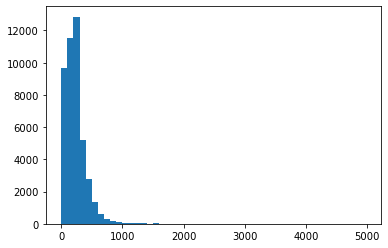

In [23]:
#count length for all rows (news) and plot them in histogram to see distrbution of length
word_count = []
for i in range(0, len(corpus)):
    x = len(corpus[i].split())
    word_count.append(x)
    
plt.hist(word_count, bins=50)

In [24]:
#define y (target value)
y = dfclean["target"]

In [25]:
#Converting the text into sequence for processing in LSTM Layers

tokenizer = Tokenizer(oov_token = "<OOV>", num_words=6000)
tokenizer.fit_on_texts(corpus)

max_length = 40
vocab_size = len(tokenizer.word_index)+1

sequences = tokenizer.texts_to_sequences(corpus)

#padding sequences to same length
padded = pad_sequences(sequences, padding = 'post', maxlen=max_length)

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

(35918, 40)
(35918,)


For word embedding using GloVe the file "glove.6B.100d.txt" must be saved in your jupyter notebook path. It can be downloaded from https://nlp.stanford.edu/projects/glove/

In [26]:
#Using word embeddings so that words with similar words have similar representation in vector space.
#It represents every word as a vector. The words which have similar meanings are placeed close to each other.

embeddings_index = {}
f = open('glove.6B.100d.txt',encoding='utf8')
for line in tqdm(f):
 values = line.split()
 word = values[0]
 coefs = np.asarray(values[1:], dtype='float32')
 embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

400001it [00:33, 11800.51it/s]

Found 400001 word vectors.


In [27]:
# create parameter vocab size, will be used for LSTM Model
vocab_size = len(tokenizer.word_index) + 1

#Converting the words in our vocabulary to their corresponding embeddings and placing them in a matrix.
print('Create the embedding matrix')
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Create the embedding matrix


## 5.0 Regression Model 

In [28]:
#fit model
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
#create predictions on test data
reg_predictions = (reg_model.predict(X_test) > 0.5).astype("int32")

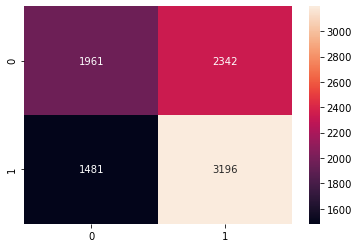

In [30]:
#confusion matrix
reg_cm = metrics.confusion_matrix(y_test, reg_predictions)
sns.heatmap(reg_cm, annot=True, fmt='d') 

In [31]:
#classification report
print(classification_report(y_test,reg_predictions))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51      4303
           1       0.58      0.68      0.63      4677

    accuracy                           0.57      8980
   macro avg       0.57      0.57      0.57      8980
weighted avg       0.57      0.57      0.57      8980



## 6.0 LSTM Model

In [32]:
model = Sequential()
model.add(Embedding(vocab_size, 
                    100, 
                    weights=[embedding_matrix], 
                    input_length=max_length,
                    trainable=False))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           8965400   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [33]:
LSTMmodel = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
562/562 [==============================] - 48s 76ms/step - loss: 0.1958 - accuracy: 0.9236 - val_loss: 0.1505 - val_accuracy: 0.9430
Epoch 2/10
562/562 [==============================] - 41s 73ms/step - loss: 0.1319 - accuracy: 0.9518 - val_loss: 0.1152 - val_accuracy: 0.9559
Epoch 3/10
562/562 [==============================] - 42s 75ms/step - loss: 0.1090 - accuracy: 0.9595 - val_loss: 0.1083 - val_accuracy: 0.9604
Epoch 4/10
562/562 [==============================] - 40s 71ms/step - loss: 0.0939 - accuracy: 0.9654 - val_loss: 0.0969 - val_accuracy: 0.9656
Epoch 5/10
562/562 [==============================] - 40s 72ms/step - loss: 0.0772 - accuracy: 0.9725 - val_loss: 0.1065 - val_accuracy: 0.9618
Epoch 6/10
562/562 [==============================] - 41s 73ms/step - loss: 0.0643 - accuracy: 0.9763 - val_loss: 0.0927 - val_accuracy: 0.9682
Epoch 7/10
562/562 [==============================] - 40s 71ms/step - loss: 0.0510 - accuracy: 0.9817 - val_loss: 0.1065 - val_accuracy:

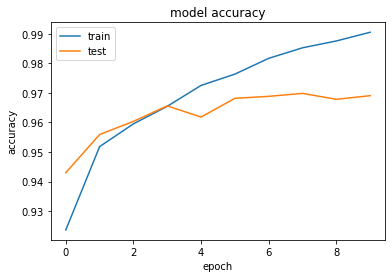

In [34]:
# summarize history for accuracy
plt.plot(LSTMmodel.history['accuracy'])
plt.plot(LSTMmodel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

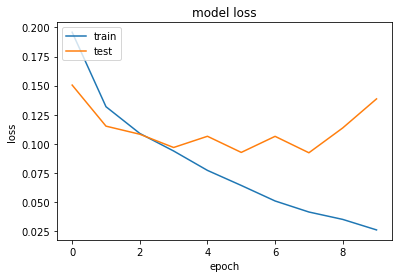

In [35]:
# summarize history for loss
plt.plot(LSTMmodel.history['loss'])
plt.plot(LSTMmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Predicting from test data
predictions = (model.predict(X_test) > 0.5).astype("int32")

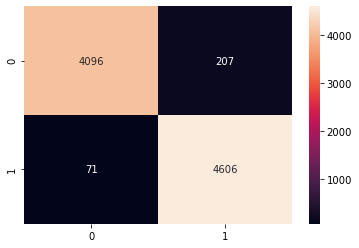

In [37]:
#Creating confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d') 

In [38]:
#classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4303
           1       0.96      0.98      0.97      4677

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

